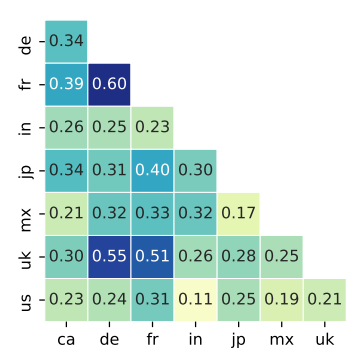

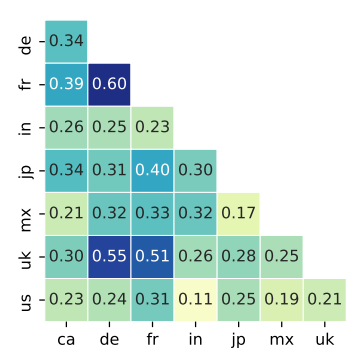

In [16]:
import seaborn as sns
def heatmap():
  sns.set_theme()
  uniform_data = np.random.rand(10, 12)
  ax = sns.heatmap(flights, cmap="YlGnBu")
  corr = np.corrcoef(np.random.randn(10, 200))
  mask = np.zeros_like(corr)
  mask[np.triu_indices_from(mask)] = True
  with sns.axes_style("white"):
      f, ax = plt.subplots(figsize=(7, 5))
      ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
from IPython.display import display
from PIL import Image

user_thr = 7
item_thr = 7


# one can iterate a few times, we only perform one time filter
def get_kcore(ratings_all, user_thr, item_thr, repeat=1):
    for i in range(repeat):
        ratings_all.reset_index(drop=True, inplace=True)
        ratings_all = ratings_all.loc[ratings_all.groupby("itemId").filter(lambda x: len(x) >= item_thr).index]
        ratings_all.reset_index(drop=True, inplace=True)
        ratings_all = ratings_all.loc[ratings_all.groupby("userId").filter(lambda x: len(x) >= user_thr).index]
        ratings_all.reset_index(drop=True, inplace=True)
    return ratings_all

def rating_stats(ratings_all):
    n_rating = ratings_all.shape[0]
    n_user = len(set(ratings_all['userId'].unique()))
    n_item = len(set(ratings_all['itemId'].unique()))
    
    if (n_user*n_item)!=0:
        density = round((n_rating/(n_user*n_item) )*100, 5)
    else:
        density = 0
        
    return { '#users': n_user,
        '#items': n_item,
        '#rates': n_rating,
        'dens\%': density,
        }
heatmap(electronics)
heatmap(home)


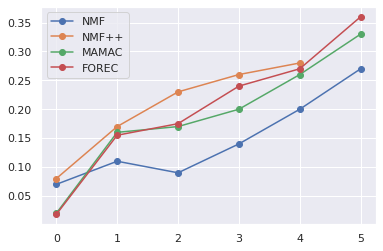

In [17]:
import os
def non():
  result_f= 'results/'
  sh_logs = os.path.join(sh_files,'logs')
  checkpoints_dir = 'checkpoints/'
  if not os.path.exists(sh_logs):
      os.mkdir(sh_files)
      os.mkdir(sh_logs)
  if not os.path.exists(exp_output_dir):
      os.mkdir(exp_output_dir)
  if not os.path.exists(checkpoints_dir):
      os.mkdir(checkpoints_dir)

  gpu_num = 1
  gpu_type = '1080ti-long' #'titanx-short', 'm40-short'

  master_file = open(os.path.join(sh_files,'master.csv'), 'w')

  for cur_exp_name, v in command_dict.items():

      bash_file_name = f'{cur_exp_name}-run.csv'
      bash_file = open(os.path.join(sh_files,bash_file_name), 'w')
      cur_log_file = os.path.join('logs', f'{cur_exp_name}.out')
      
      bash_file.write('#SBATCH --partition=%s'%(gpu_type) + '\n')
      bash_file.write('#SBATCH --ntasks=%s'%(1) + '\n')
      bash_file.write('#SBATCH --gres=gpu:%s'%(str(gpu_num)) + '\n')
      bash_file.write('#SBATCH --mem=%iG'%(50*gpu_num) + '\n')
      bash_file.write('#SBATCH --output=%s'%(cur_log_file) + '\n')

      bash_file.write('\ncd ..\n')
      if 'base' in v:
          bash_file.write(v['base'] + '\n\n')
      if 'maml' in v:
          bash_file.write(v['maml'] + '\n\n')
      if 'forec' in v:
          bash_file.write(v['forec'] + '\n\n')

      bash_file.close()
      master_file.write(f'sbatch {bash_file_name}\n')
      print(cur_exp_name + ' bash is created!')

  master_file.close()
# plot_cohesion_history(full_cc_commit)
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot(NMF, label = "NMF", marker = "o")
ax.plot(NMFplusplus, label = "NMF++", marker = "o")
ax.plot(MAML, label = "MAMAC", marker = "o")
ax.plot(FOREC, label = "FOREC", marker = "o")
ax.legend()
plt.show()

In [24]:
import pandas as pd
def don():
  all_poss_pairs = []
  for target_market in target_markets:
      for source_market in source_markets:
          if target_market==source_market:
              continue
          if data_augment_method=='no_aug':
              source_market='xx'
          all_poss_pairs.append((target_market, source_market))
          print(f'\t--> ({target_market}, {source_market})')
  all_poss_pairs = list(set(all_poss_pairs))
  results['args'] = str(args)
  results['user_stats'] = tgt_user_stats
  with open('result.csv', 'w') as outfile:
    json.dump(results, outfile)
  

student_data = pd.read_csv("/content/result.csv")

print(student_data)

  Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3  nDCG@10 Unnamed: 5 Unnamed: 6  \
0        NaN        NaN        NaN        NaN      NaN        NaN        NaN   
1        NaN        NaN         de         jp       in         fr         ca   
2        NaN        GMF     0.1211     0.2016   0.0512     0.4212     0.3123   
3     Single        MLP     0.2319     0.2415   0.5921     0.4222     0.2989   
4        NaN        NMF     0.2043     0.3654   0.5869     0.3914     0.2574   
5        NaN        NaN        NaN        NaN      NaN        NaN        NaN   
6        NaN        NaN        NaN        NaN      NaN        NaN        NaN   
7        NaN       MAML    0.2746†    0.5016†   0.6167    0.4682†    0.3457†   
8   Best-Src      FOREC    0.2938∗    0.5197†  0.6434∗    0.4742†    0.3565†   

  Unnamed: 7 Unnamed: 8  
0        NaN        NaN  
1         mx         uk  
2     0.5112     0.3242  
3     0.4936     0.3219  
4     0.5019     0.3353  
5        NaN        NaN  
6        NaN     